Amazon Fine Food Reviews Analysis¶
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

Id
ProductId - unique identifier for the product
UserId - unqiue identifier for the user
ProfileName
HelpfulnessNumerator - number of users who found the review helpful
HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
Score - rating between 1 and 5
Time - timestamp for the review
Summary - brief summary of the review
Text - text of the review

Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1, 2, 3)

In [6]:
# Import Data Set 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split

In [10]:
data = pd.read_csv(r'/Users/samipya/Desktop/train_articles.csv')
#df = data.copy()

In [ ]:
data.head()

In [38]:
# for model building consider 1,2,3 star rating as 0(Low Rating) and 4,5 included as 1(High  Rating)
df = data[pd.notnull(data.Summary)]
df['Score'] = df['Score'].apply(lambda x: 1 if (x > 3)  else 0)
print(df.shape)
df.head()

(397900, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...
4,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


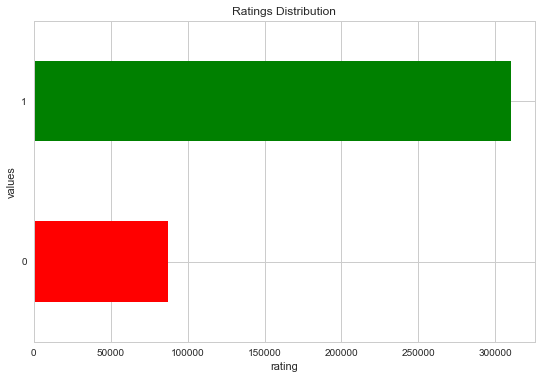

In [39]:
##Distribution of the Score
df1 = df.groupby('Score').size()
df1.plot(kind='barh',title = 'Ratings Distribution', color =( 'red', 'green'))
plt.xlabel('rating')
plt.ylabel('values')
plt.show()

In [40]:
# Calculate Percentage of High Rating and low Rating
percentage = df1/sum(df1)*100
percentage

Score
0    22.007037
1    77.992963
dtype: float64

78% data correspond to Positive rating class and 22% Reviews are correspond to Negative class rating

In [44]:
# Define x and y (Considering only Summary & Text columns for classification)
x = df.Summary + df.Text
y = df.Score

#Splitting the data into Train & Test
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [46]:
# Create instantiation for CounterVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
x_train_dtm = vect.fit_transform(x_train)
x_train_dtm
print(type(x_train_dtm))
print(x_train_dtm.shape)
print(x_train_dtm[10,:])

<class 'scipy.sparse.csr.csr_matrix'>
(298425, 148112)
  (0, 104484)	1
  (0, 114694)	1
  (0, 133287)	1
  (0, 4946)	1
  (0, 46791)	1
  (0, 132244)	1
  (0, 65706)	1
  (0, 32420)	1
  (0, 27520)	1
  (0, 46716)	1
  (0, 78808)	1
  (0, 45743)	1
  (0, 47335)	1
  (0, 34648)	1
  (0, 79748)	2
  (0, 27291)	1
  (0, 18316)	1
  (0, 65992)	2
  (0, 34398)	1
  (0, 114220)	1
  (0, 84787)	1
  (0, 83952)	1
  (0, 106413)	1
  (0, 117331)	1
  (0, 1760)	1
  :	:
  (0, 120180)	1
  (0, 32096)	1
  (0, 93701)	1
  (0, 22790)	3
  (0, 10621)	3
  (0, 146704)	2
  (0, 141056)	5
  (0, 89084)	3
  (0, 57272)	2
  (0, 144646)	2
  (0, 91517)	1
  (0, 132330)	8
  (0, 70642)	3
  (0, 73194)	2
  (0, 8328)	2
  (0, 121238)	1
  (0, 142523)	3
  (0, 93731)	1
  (0, 133111)	2
  (0, 6966)	2
  (0, 132850)	1
  (0, 72983)	1
  (0, 95094)	1
  (0, 134171)	6
  (0, 92776)	3


In [47]:
# transform testing data (using fitted vocabulary) into a document-term matrix
x_test_dtm = vect.transform(x_test)

# MULTINOMIAL NAIVE BAYES

In [48]:
# Create instantiation of Multinomial Naive bayes and from that check about various parameters
#by default laplace smooting i.e. alpha=1.0
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
# to know how much time this command will take for execution
%time nb.fit(x_train_dtm, y_train)

CPU times: user 287 ms, sys: 107 ms, total: 394 ms
Wall time: 666 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
# Prediction using Multinomial Naive bayes
y_pred_class = nb.predict(x_test_dtm)

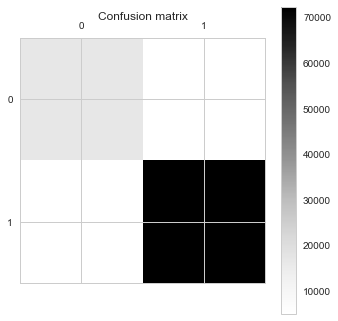

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
gb=metrics.confusion_matrix(y_test, y_pred_class)

#Plot of Confusion Metric
import matplotlib as plt
from sklearn.metrics import confusion_matrix
import pylab as pl
pl.matshow(gb)
# cm = metrics.confusion_matrix(y_test, y_pred_class, labels=['FAKE', 'REAL'])
pl.title('Confusion matrix')
pl.colorbar()
pl.show()

In [55]:
# Accuracy must be greater than 84% in this case because without any model text belong to positive class
# is 84%, this is imbalanced data set
print('Accuracy', metrics.accuracy_score(y_test, y_pred_class))
print('Recall',metrics.recall_score(y_test,y_pred_class))
print('Precision' ,metrics.precision_score(y_test,y_pred_class))
print('F1-Score',metrics.f1_score(y_test,y_pred_class))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class,target_names=['Negative','Positive']))

Accuracy 0.895943704448
Recall 0.93167125969
Precision 0.934813226002
F1-Score 0.933239598315
             precision    recall  f1-score   support

   Negative       0.76      0.77      0.76     21821
   Positive       0.93      0.93      0.93     77654

avg / total       0.90      0.90      0.90     99475



ROC Rate 0.932301153229


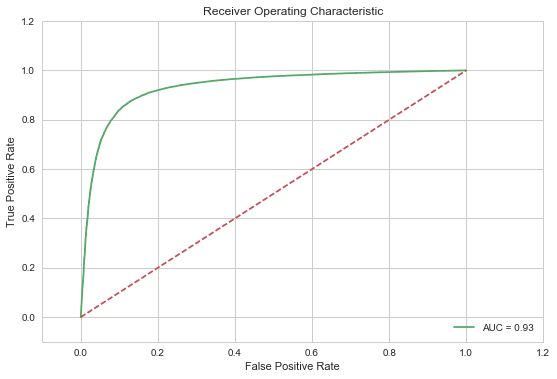

In [58]:
# calculate AUC without probabilities values
y_pred_prob = nb.predict_proba(x_test_dtm)[:,1]
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC Rate', roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# train the model using X_train_dtm
%time logreg.fit(x_train_dtm, y_train)

CPU times: user 7min 56s, sys: 5.15 s, total: 8min 1s
Wall time: 4min 18s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
# make class predictions for X_test_dtm
y1_pred_class = logreg.predict(x_test_dtm)

In [63]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y1_pred_prob = logreg.predict_proba(x_test_dtm)[:,1]

# Calculating ROC Rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y1_pred_prob)
roc_lg = auc(false_positive_rate, true_positive_rate)
print('ROC Rate', roc_lg)

ROC Rate 0.955653391215


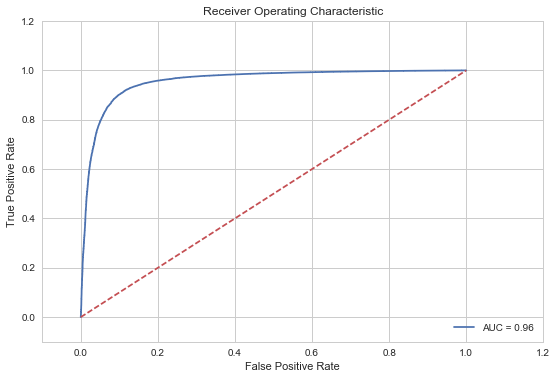

In [64]:
# PLot AUC For Logistic Regression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_lg)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
# calculate accuracy,precision,recall,F1 score
print('Accuracy', metrics.accuracy_score(y_test, y1_pred_class))
print('Recall', metrics.recall_score(y_test,y1_pred_class))
print('Precision', metrics.precision_score(y_test,y1_pred_class))
print('F1 Score', metrics.f1_score(y_test,y1_pred_class))

#  classification_report
print(classification_report(y_test,y1_pred_class,target_names=['Negative','Positive']))

Accuracy 0.922975622016
Recall 0.961689030829
Precision 0.940944485044
F1 Score 0.951203668323
             precision    recall  f1-score   support

   Negative       0.85      0.79      0.82     21821
   Positive       0.94      0.96      0.95     77654

avg / total       0.92      0.92      0.92     99475



# LOGISTIC REGRESSION THROUGH L1 REGULARIZATION

In [67]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(penalty='l1',C=1)
%time logreg1.fit(x_train_dtm, y_train)

CPU times: user 46.3 s, sys: 1.19 s, total: 47.5 s
Wall time: 51.2 s


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
# make class predictions for X_test_dtm
y2_pred_class = logreg1.predict(x_test_dtm)

ROC Rate 0.955653391215


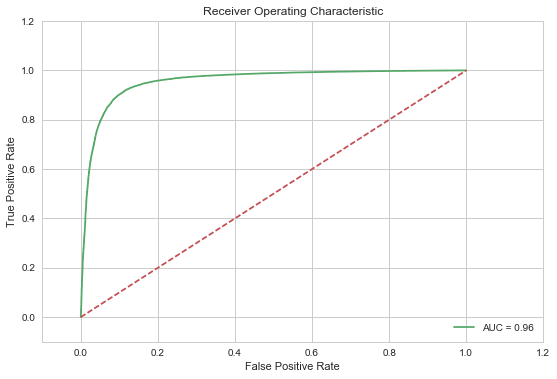

In [72]:
# Calculating ROC Rate
y2_pred_prob = logreg.predict_proba(x_test_dtm)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y2_pred_prob)
roc_lg = auc(false_positive_rate, true_positive_rate)
print('ROC Rate', roc_lg)
from matplotlib import pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_lg)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# calculate accuracy,precision,recall,F1 score
print('Accuracy', metrics.accuracy_score(y_test, y2_pred_class))
print('Recall', metrics.recall_score(y_test,y2_pred_class))
print('Precision', metrics.precision_score(y_test,y2_pred_class))
print('F1 Score', metrics.f1_score(y_test,y2_pred_class))

# LINEAR SVM USING SGD

In [74]:
# fit train data into Model
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
%time clf.fit(x_train_dtm, y_train)

CPU times: user 1.05 s, sys: 96.7 ms, total: 1.15 s
Wall time: 1.05 s


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [76]:
# Predict the class label on test class
ys_pred_class = clf.predict(x_test_dtm)


In [77]:
# Evaluation Metrics for SVM Model
print('Accuracy', metrics.accuracy_score(y_test, ys_pred_class))
print('Recall',metrics.recall_score(y_test,ys_pred_class))
print('Precision' ,metrics.precision_score(y_test,ys_pred_class))
print('F1-Score',metrics.f1_score(y_test,ys_pred_class))
from sklearn.metrics import classification_report
print(classification_report(y_test,ys_pred_class,target_names=['Negative','Positive']))

Accuracy 0.894174415682
Recall 0.923893167126
Precision 0.939537198308
F1-Score 0.931649514658
             precision    recall  f1-score   support

   Negative       0.74      0.79      0.77     21821
   Positive       0.94      0.92      0.93     77654

avg / total       0.90      0.89      0.90     99475



ROC Rate 0.856153998439


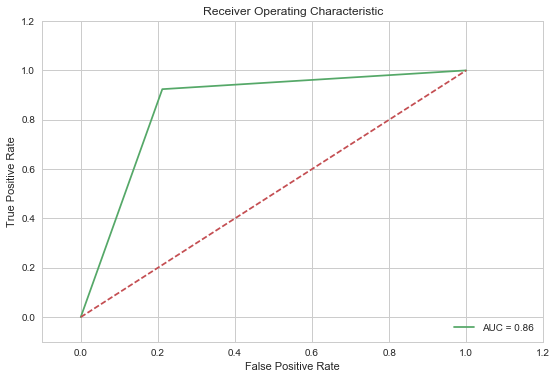

In [78]:
# calculate AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ys_pred_class)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC Rate', roc_auc)

# plot AU-ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K - Fold Cross Validation

In [80]:
from sklearn import linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
Xlg = vect.fit_transform(x)
Xlg

<397900x172065 sparse matrix of type '<class 'numpy.int64'>'
	with 22209354 stored elements in Compressed Sparse Row format>

In [81]:
# 3-fold cross-validation with c=100 for logestic regression
logreg = LogisticRegression(C=100)
%time scores = cross_val_score(logreg, Xlg, y, cv=3, scoring='accuracy')
print(scores)

CPU times: user 24min 55s, sys: 15.1 s, total: 25min 10s
Wall time: 13min 15s
[ 0.91950782  0.9227649   0.92253755]


In [82]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.921603422639


In [83]:
# 2-fold cross-validation with c=0.05 for logestic regression
logreg = LogisticRegression(penalty='l1',C=0.05)
%time scores = cross_val_score(logreg, Xlg, y, cv=2, scoring='accuracy')
print(scores)

CPU times: user 15 s, sys: 1.23 s, total: 16.2 s
Wall time: 16.5 s
[ 0.8976577   0.89975873]


In [84]:
# search for an optimal value of Lambda for Logistic Regression C=1/Lambda
logrg = LogisticRegression(penalty='l1',C=0.05)
L_range = list(range(1,5))
L_scores = []
for l in L_range:
    logreg = LogisticRegression(C=l)
    scores = cross_val_score(logrg, Xlg, y, cv=3, scoring='accuracy')
    L_scores.append(scores.mean())
print(L_scores)

[0.90123901075781465, 0.90122393159219438, 0.90123649757617708, 0.90123649753827995]


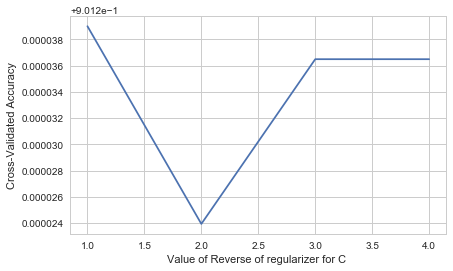

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of Lambda for Logestic Regression(x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(L_range, L_scores)
plt.xlabel('Value of Reverse of regularizer for C ')
plt.ylabel('Cross-Validated Accuracy')